In [9]:
import imageio
import numpy as np 
import matplotlib.pyplot as plt

C:\Users\Margarita Zerpa\AppData\Local\Temp\ipykernel_4244\792063440.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im1 = imageio.imread('imageio:coffee.png')[:,50:550,:]/255.


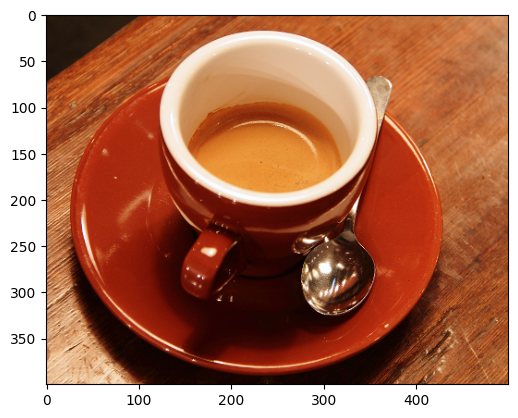

C:\Users\Margarita Zerpa\AppData\Local\Temp\ipykernel_4244\792063440.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im2=imageio.imread('imageio:astronaut.png')[56:456,6:506,:]/255.


Imageio: 'astronaut.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/astronaut.png (773 kB)
Downloading: 8192/791555 bytes (1.0114688/791555 bytes (14.5%212992/791555 bytes (26.9%294912/791555 bytes (37.3%376832/791555 bytes (47.6%442368/791555 bytes (55.9%491520/791555 bytes (62.1%557056/791555 bytes (70.4%606208/791555 bytes (76.6%655360/791555 bytes (82.8%720896/791555 bytes (91.1%786432/791555 bytes (99.4%791555/791555 bytes (100.0%)
  Done
File saved as C:\Users\Margarita Zerpa\AppData\Local\imageio\images\astronaut.png.


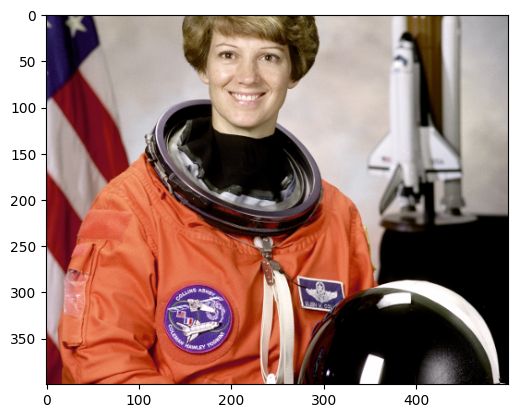

In [11]:
im1 = imageio.imread('imageio:coffee.png')[:,50:550,:]/255.

plt.imshow(im1)
plt.show()

im2=imageio.imread('imageio:astronaut.png')[56:456,6:506,:]/255.

plt.imshow(im2)
plt.show()

In [12]:
def RGB_to_YIQ(rgb):
    yiq =np.zeros(rgb.shape)
    yiq[:,:,0]=0.229*rgb[:,:,0]+0.587*rgb[:,:,1]+0.114*rgb[:,:,2]
    yiq[:,:,1]=0.595716*rgb[:,:,0]+0.274453*rgb[:,:,1]+0.321263*rgb[:,:,2]
    yiq[:,:,2]=0.211453*rgb[:,:,0]+0.522591*rgb[:,:,1]+0.311135*rgb[:,:,2]
    return yiq

In [13]:
def YIQ_to_RGB(yiq):
    rgb =np.zeros(yiq.shape)
    rgb[:,:,0]=yiq[:,:,0]+0.9663*yiq[:,:,1]+0.6210*rgb[:,:,2]
    rgb[:,:,1]=yiq[:,:,0]+0.2721*yiq[:,:,1]+0.6474*rgb[:,:,2]
    rgb[:,:,2]=yiq[:,:,0]+1.1070*yiq[:,:,1]+1.7046*rgb[:,:,2]
    return rgb

In [14]:
yiq1=RGB_to_YIQ(im1)
yiq2=RGB_to_YIQ(im2)

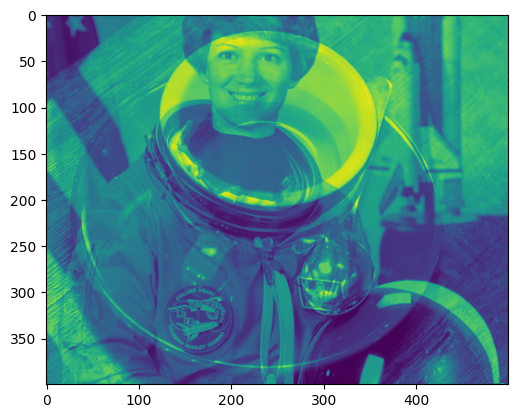

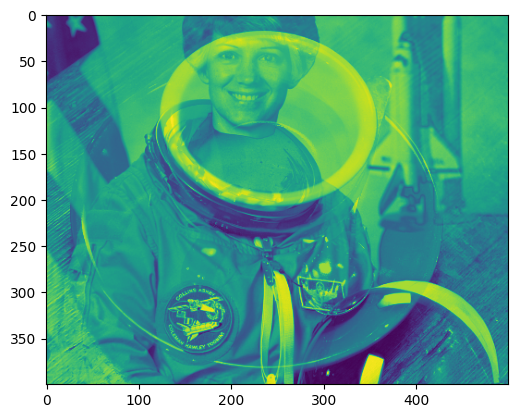

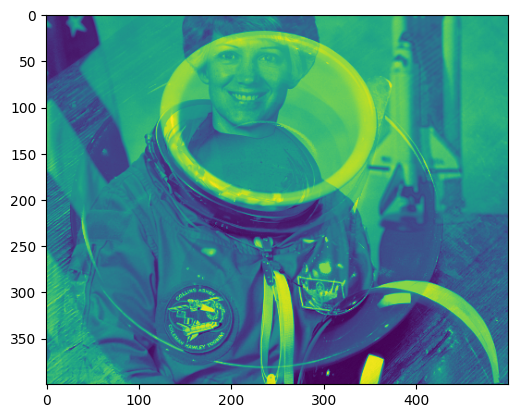

In [15]:
YC=yiq1[:,:,0]+yiq2[:,:,0]
IC=(yiq1[:,:,0]*yiq1[:,:,1]+yiq2[:,:,0]*yiq2[:,:,1])/(yiq1[:,:,0]+yiq2[:,:,0])
QC=(yiq1[:,:,0]*yiq1[:,:,2]+yiq2[:,:,0]*yiq2[:,:,2])/(yiq1[:,:,0]+yiq2[:,:,0])

plt.figure(0)
plt.imshow(YC)
plt.figure(1)
plt.imshow(IC)
plt.figure(2)
plt.imshow(QC)
